# Multiple linear regression on 'cars' dataset
## Predicting MPG of the car based on other variables(i.e HP, VOL, SP, WT)
#### Where MPG= average miles per gallon, HP= engine horsepower, VOL= cube feet of cab space, SP=top speed(in miles per hour), WT=vehicle weight(hundreds of pounds)

In [3]:
import pandas as pd
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
cars=pd.read_csv('Cars.csv')
cars.head(15)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
5,70,45.696322,89,113.185353,29.591768
6,55,50.013401,92,105.461264,30.308480
7,62,46.716554,50,102.598513,15.847758
8,62,46.716554,50,102.598513,16.359484
9,80,42.299078,94,115.645204,30.920154


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Correlation coefficient matrix

In [6]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


#### From the above o/p--->HP & SP is having strong correlation(i.e 0.97), and VOL & WT is also having strong correlation(i.e 0.99). And it is also observed that the correlation of MPG with other input variables is weak/moderate.
#### If the corr. coff. value for any 2 variables is 1 or -1, then those 2 variables leads to collinearity, here VOL & WT have corr. coeff. closer to +1, so indirectly it tells that there is collinearity problem b/w VOL & WT.

# Pairplot

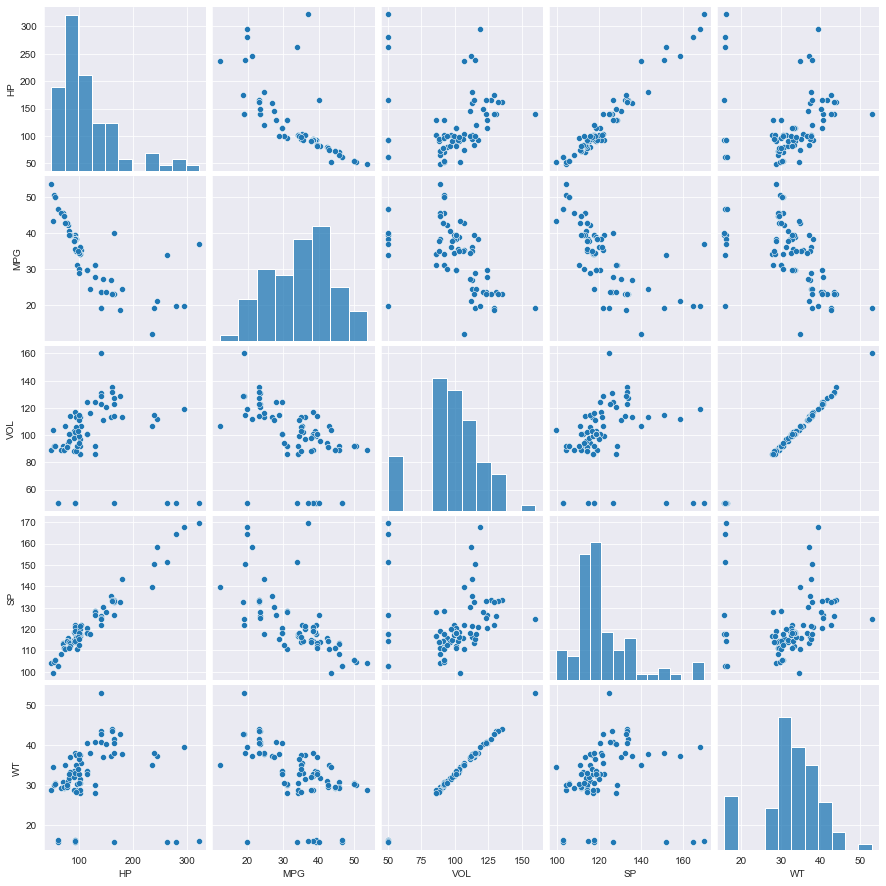

In [7]:
import seaborn as sns
sns.set_style('darkgrid')
sns.pairplot(cars)

#### From the above o/p---> like the corr. coeff. matrix same kind of conclusion can be made, i.e there is strong relation b/w SP & HP and b/w VOL & WT. But among SP &HP and VOL & WT, VOL & WT has strong collinearity as it is perfect +1, whereas the effect of collinearity b/w SP & HP is slightly less.
#### From the above pairplot , we can see that there is strong +ve correlation (where the corr. coeff is +1) b/w VOL & WT. So, this also indirectly tells us that there is collinearity problem b/w VOL & WT.

# Preparing a model

In [8]:
#performing summary fn. by considering all the input variables, without thinking whether there is collinearity or not.
import statsmodels.formula.api as smf
model1=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.54e-23
Time:                        09:11:31   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### From the above o/p---> the R sq. value is less thatn 0.85 which tells that the model which has been built is not a best model.Also p-values of VOL & WT is not less than 0.05, that means VOL & WT should not be used as an input variable for predicting MPG of the car. But rather on coming to conclusions, we have to confirm by performing any other method that whether that it is true that VOL & WT are not useful input variables.

#### So, to confirm this let us perform simple linear regression on the 2 input variables(VOL & WT) separately.

# Simple linear regression 

In [9]:
#performing linear regression only on the variable 'VOL'
ml_v=smf.ols('MPG~VOL',data=cars).fit()
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           3.82e-07
Time:                        09:11:34   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the above o/p---> the P value of VOL is less than 0.05(i.e 0.00), but the R sq value is still not improved which is still less that 0.85(i.e 0.28).

In [10]:
#performing linear regression only on the variable 'WT'
ml_w=smf.ols('MPG~WT',data=cars).fit()
ml_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           4.38e-07
Time:                        09:11:35   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the above o/p---> the P value of WT is less than 0.05(i.e 0.00), but the R sq value is still not improved which is still less that 0.85(i.e 0.277).

#### So when we build the simple linear reg model individually on both the variables, then there occurs no problem in p-value. Now, let us another model by combining both the variables.

In [11]:
ml_vw=smf.ols('MPG~WT+VOL',data=cars).fit()
ml_vw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.43e-06
Time:                        09:11:37   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the above o/p---> the p-value for both the variables is greater than 0.05 and still the R sq. value is not improved. So, from this also we can conclude that there is collinearity problem when we use VOL & WT together.

#### Another method, to check the collinearity is by calculating variance inflation factor(VLF)

# Calculating Variance Inflation factor(VIF)

In [12]:
rsq_hp=smf.ols('HP~VOL+SP+WT',data=cars).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_wt=smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt=1/(1-rsq_wt)

rsq_vol=smf.ols('VOL~HP+SP+WT',data=cars).fit().rsquared
vif_vol=1/(1-rsq_vol)

rsq_sp=smf.ols('SP~HP+WT+VOL',data=cars).fit().rsquared
vif_sp=1/(1-rsq_sp)

#storing vif values in a dataframe
d1={'Variables':['HP','Wght','Vol','Spd'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,HP,19.926589
1,Wght,639.533818
2,Vol,638.806084
3,Spd,20.007639


#### From the above methods that is corr. coeff. matrix, pairplots we have concluded that VOL, WT have collinearity. But if it is so, we will lose the data of those 2 variables, so to confirm this we have performed VLF, in which it concludes that VIF value of VOL, WT is more than 20, hence these 2 variables will have collinearity.But among these 2 variables, the variable WT is quiet more than 20(from this we can remove only the WT column's data).Therefore, we can conclude that WT has collinearity problem.

#### Though WT has collinearity, still we will not remove that column completely because if we remove that column we will lose 81 values' data. So, we will find out if there are any records to be deleted and then our model improves or not and that can be performed by 'Model Deletion Diagnostics' methods like Cook's distance,Hat points/leverage value/influence etc.

# Residual analysis

# Test for normality of residuals(Q-Q plot)

In [13]:
res=model1.resid
res

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Length: 81, dtype: float64

##### above are the errors calculated for all the 81 records.

In [14]:
#calculating mean of the residuals/errors
res.mean()

-5.4496873406291635e-14

##### From the above o/p, we can see that the mean of errors is not equal to zero. So, one assumption about the errors is not satisfied.

<function matplotlib.pyplot.show(close=None, block=None)>

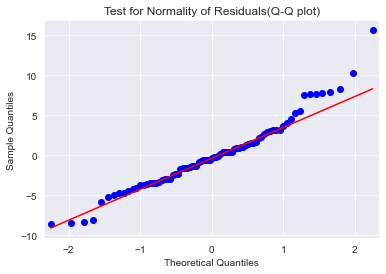

In [15]:
#creating Q-Q plot
import statsmodels.api as sm
qqplot=sm.qqplot(res,line='q')
plt.title("Test for Normality of Residuals(Q-Q plot)")
plt.show

##### From the above Q-Q plot, we  can see that the errors are not normally distributed(so another assumption about the errors is not satisfied). 2 points (which is more than 10) are far away from the Q-Q line(red line) compared to other points. Those 2 values' row no. can be found by below code. 

In [16]:
#displaying the row number for the errors having values greater than 10
list(np.where(model1.resid>10))

[array([ 0, 76], dtype=int64)]

# Residual plot for homoscedasticity

#### Here, the errors and the predicted mpg value is of different range of values(as in above figure), so in order to rescale them we should perform standardisation.

In [17]:
def get_standardized_values(vals):
    return (vals-vals.mean()/vals.std())

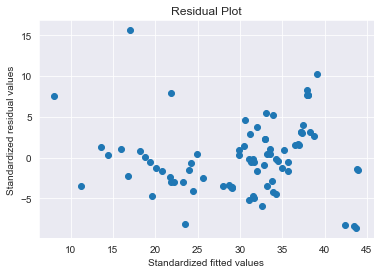

In [18]:
plt.scatter(get_standardized_values(model1.fittedvalues), #fitted values-->that is predicted values
            get_standardized_values(model1.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#### From the above scatter plot, the points are forming U-shaped pattern which tells us that the errors are non-linear. So the "assumption about the predictors: linearly independent of each other" is not satisfied.
#### Other assumptions for errors like 'zero mean' , 'normally distirbuted' is also not satisfied.

# Residual plots: Residuals Vs Regressors

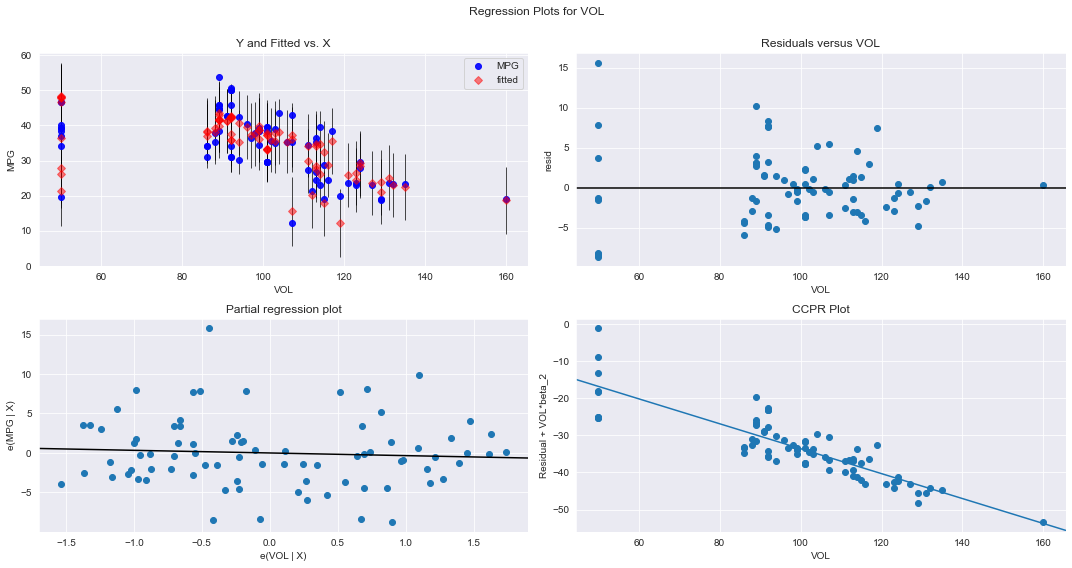

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1,'VOL',fig=fig)
plt.show()

##### From the above visualization,in the 1st plot [1,1] the actual and the fitted values are not overlapping, which means there is error.
##### The 2nd plot [1,2] , resembles a funnel shaped pattern which means the errors do not have constant variance. 
##### The 3rd plot [2,1] (i.e partial regression plot) which is plotted b/w predicted MPG value and input var VOL which has almost a horizontal line that is low slope so instead of having a higher slope here there is low slope. 
##### The 4th plot [2,2] (i.e CCPR plot) is plotted b/w errors and VOL where here some of the errors are away from the regressor line but has a good slope.
##### So from this we can conclude that there occurs problem if we use the input variable 'VOL'.

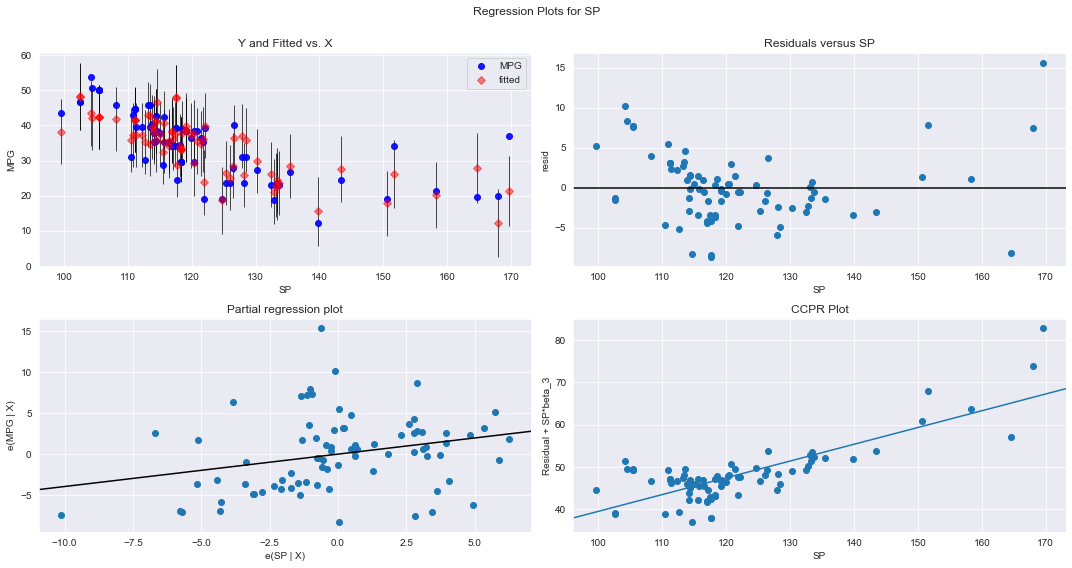

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1,'SP',fig=fig)
plt.show()

##### From the above visualization,in the 1st plot [1,1] the actual and the fitted values are not overlapping, which means there is error.
##### The 2nd plot [1,2] , resembles a slight U shaped pattern which means the errors are not having linear relationship. 
##### The 3rd plot [2,1] (i.e partial regression plot) which is plotted b/w predicted MPG value and input var SP which has a good +ve slope.
##### The 4th plot [2,2] (i.e CCPR plot) is plotted b/w errors and SP ,this also has a good positive slope.
##### So atleast from the last 2 plots, we can conclude that we can use the input variable 'SP'.

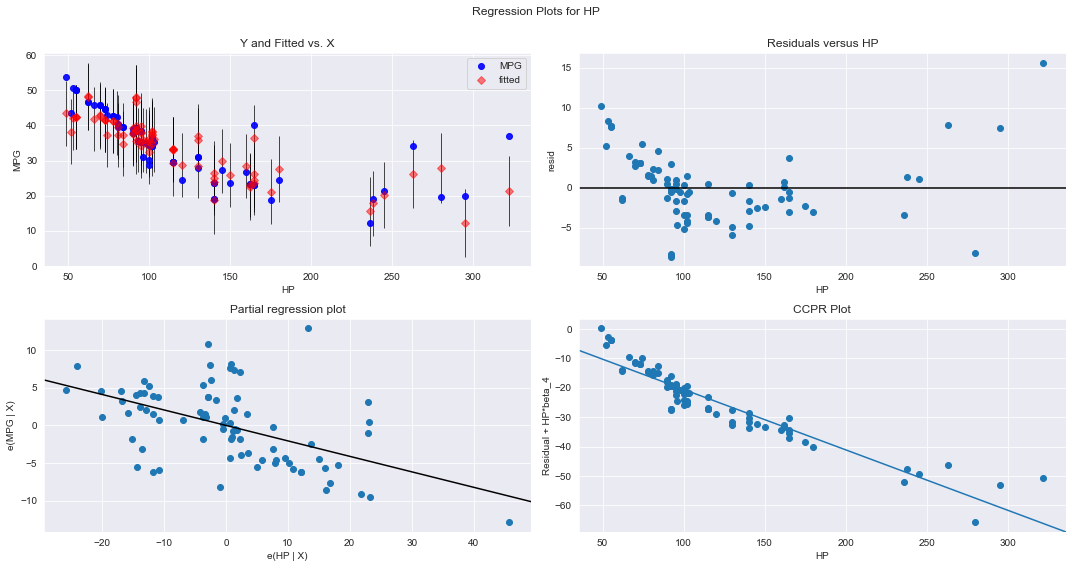

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1,'HP',fig=fig)
plt.show()

##### From the above visualization,in the 1st plot [1,1] the actual and the fitted values are not overlapping, which means there is error.
##### The 2nd plot [1,2] , resembles a slight U shaped pattern which means the errors are not having linear relationship. 
##### The 3rd plot [2,1] (i.e partial regression plot) which is plotted b/w predicted MPG value and input var HP which has a good slope.
##### The 4th plot [2,2] (i.e CCPR plot) is plotted b/w errors and HP ,this also has a good slope with most of the errors on the regressor line.
##### So atleaast from the last 2 plots, we can conclude that we can use the input variable 'HP'.

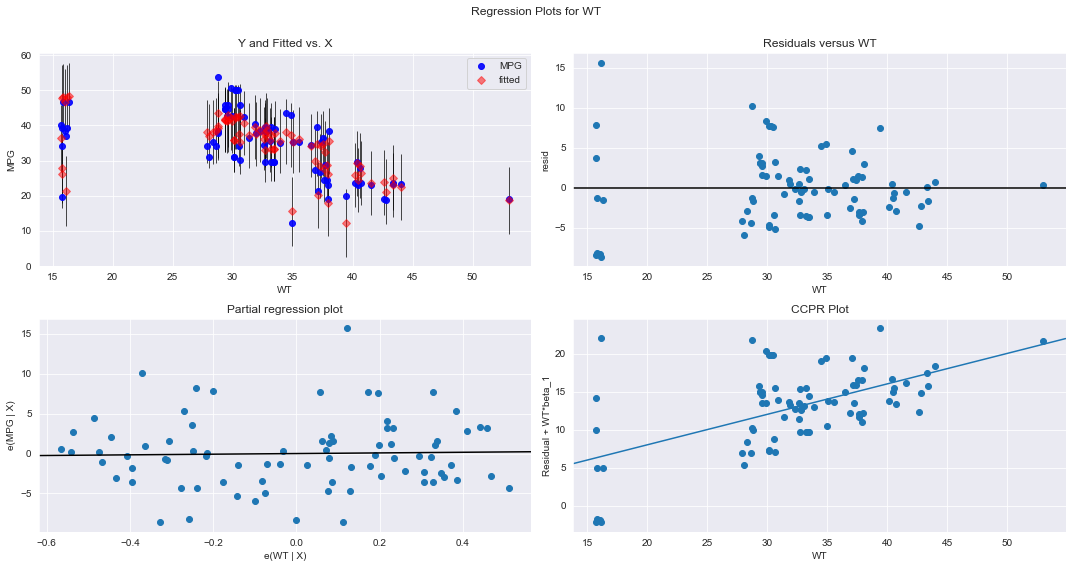

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1,'WT',fig=fig)
plt.show()

##### From the above visualization, the partial regressor plot has a horizontal line and not a good slope. So, from this we can tell that 'WT' can't be used as an input variable.

#### From the above plots, we can conclude that problem occurs when 'VOL' and 'WT' are used as input variable, and WKT that is due to collinearity. 

# Partial regression plot

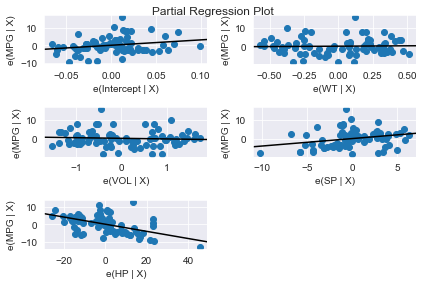

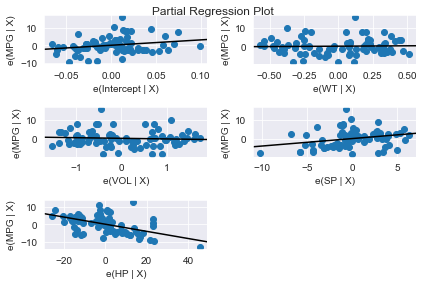

In [23]:
sm.graphics.plot_partregress_grid(model1)

##### Instead of constructing 4 graphs separately, we can also create partial reg. plot using above code in one go.

# Model Deletion Diagnostics

#### Though WT has collinearity(which is found out by VIF), still we will not remove that column completely because if we remove that column we will lose 81 values' data. So, we will find out if there are any records to be deleted and then our model improves or not and that can be performed by 'Model Deletion Diagnostics' methods like Cook's distance, Hat points/leverage value/influence etc.

In [24]:
model_influence=model1.get_influence()
(c,_)=model_influence.cooks_distance #in (c,_)--> _ represents eliminate other things and consider only the cook's distance.

In [25]:
c

array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
       2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
       4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
       3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
       1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
       1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
       1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
       3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
       4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
       3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
       2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
       1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
       1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
       1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.46695414e-04,
      

##### Above are the cook's distance values calculated for all the 81 records

In [26]:
import warnings
warnings.simplefilter('ignore')

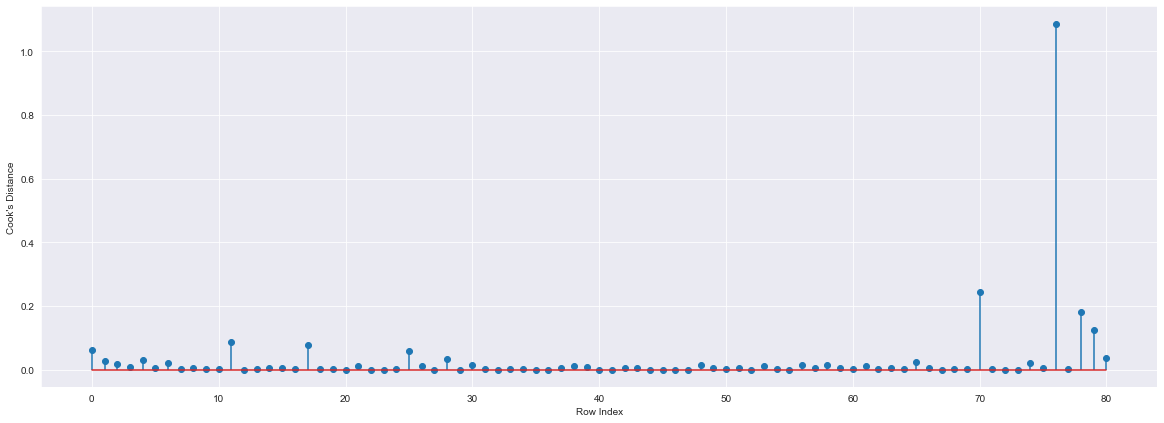

In [27]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3)) 
plt.xlabel("Row Index")
plt.ylabel("Cook\'s Distance")
plt.show()

In [28]:
#getting the row index which has max value and getting the value which is maximum.
np.argmax(c),np.max(c)

(76, 1.0865193998179867)

##### Hence 76th record is the influential record(outlier) and that has to be eliminated.

# High Influence points

<function matplotlib.pyplot.show(close=None, block=None)>

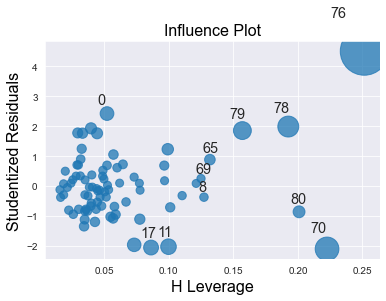

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show

##### Bubble size is more, that means influence is more. From the above plot, we can see that 76th record is having the highest influence.

In [30]:
k=cars.shape[1]
n=cars.shape[0]
leverage_cutoff=3*((k+1)/n) #where k is the no. of columns and n is the no. of rows in the dataset

In [31]:
leverage_cutoff

0.2222222222222222

##### Beyond the leverage cutoff value i.e 0.22, all are influential points in the plot. Here, 70th and 76th record are more than the cutoff value.

In [32]:
#displaying the data of the index values which are greater than the cutoff value
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [33]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


##### By comparing the above output with influential record output, we can see that the 4 input values of 70th and 76th record are more than other datapoints, hence 70th & 76th record are the outliers. So, instead of removing the WT column(which leads to collinearity) as a whole, we can remove the influential records(70th, 76th) only and see whether the model is improving(i.e whether R sq value is improving). 

# Improving the model(cars)

In [34]:
cars=pd.read_csv('Cars.csv')

In [35]:
cars_new=cars.drop(cars.index[[76,70]],axis=0).reset_index() #row-wise we want to remove,so we are mentioning axis=0
cars_new

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [36]:
cars1=cars_new.drop(['index'],axis=1)
cars1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# Building the model(cars1)

In [37]:
final_ml_v=smf.ols('MPG~VOL+SP+HP',data=cars1).fit()

In [38]:
(final_ml_v.rsquared, final_ml_v.aic)

(0.8161692010376007, 446.11722639447726)

In [39]:
final_ml_w=smf.ols('MPG~WT+SP+HP',data=cars1).fit()

In [40]:
(final_ml_w.rsquared, final_ml_w.aic)

(0.8160034320495304, 446.1884323575031)

##### R sq value of VOL model is greater than the R sq value of WT model. WKT, errors should not have any information(i.e errors must be min)--->so min the error, min will be the AIC value--->here AIC value of VOL model is min than that of AIC value of WT.
##### So, last time when he had used all the 81 rows, the R sq value was 0.771. Now, when we have removed 70th & 76th row, and built a model, the R sq value has been improved to 0.8161. But still, R sq value is not greater than 0.85 so again we will build a model and calculate cook's distance.

# Cook's Distance(final_ml_v)

In [41]:
model_influence_v=final_ml_v.get_influence()
(c_v,_)=model_influence_v.cooks_distance

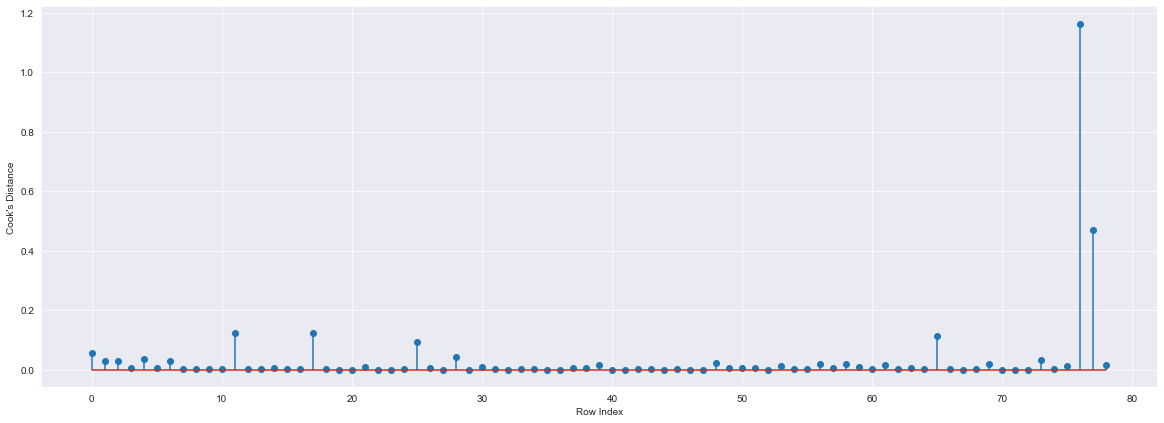

In [42]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars1)),np.round(c_v,3)) 
plt.xlabel("Row Index")
plt.ylabel("Cook\'s Distance")
plt.show()

In [43]:
#getting the row index which has max value and getting the value which is maximum.
np.argmax(c_v),np.max(c_v)

(76, 1.1629387469135095)

##### Hence 76th record is the influential record(outlier) and that has to be eliminated.(But it is not the same 76th record as before model, now we have reset the index)

# Improving the model(cars1)

In [44]:
cars2=cars1.drop(cars1.index[[76,77]],axis=0).reset_index()

In [45]:
cars2

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
72,72,140,19.086341,160,124.715241,52.997752
73,73,140,19.086341,129,121.864163,42.618698
74,74,175,18.762837,129,132.864163,42.778219
75,75,238,19.197888,115,150.576579,37.923113


In [46]:
cars3=cars2.drop(['index'],axis=1)
cars3

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


##### Till now,by removing the influential records we couldn't construct a good model. So we will give another try by removing the WT column (which is having highest VIF value) --> so now in this model we will build using VOL,SP,HP(i.e excluding WT)

# Rebuilding the model(cars3) using cook's distance-->Final model

In [47]:
final_ml_vol=smf.ols('MPG~VOL+SP+HP', data=cars3).fit()

In [48]:
model_influence_vol=final_ml_vol.get_influence()
(c_vol,_)=model_influence_vol.cooks_distance

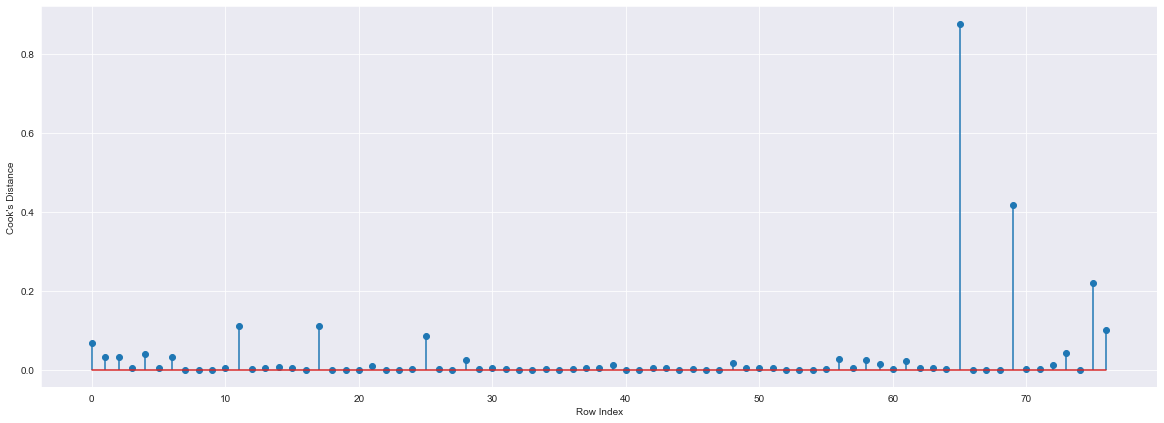

In [49]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars3)),np.round(c_vol,3)) 
plt.xlabel("Row Index")
plt.ylabel("Cook\'s Distance")
plt.show()

In [50]:
#getting the row index which has max value and getting the value which is maximum.
np.argmax(c_vol),np.max(c_vol)

(65, 0.8774556986296775)

In [51]:
(final_ml_vol.rsquared,final_ml_vol.aic)

(0.8669636111859063, 409.4153062719508)

##### From the above o/p we can see that the R sq value has been improved (previously it was 0.81, now it is 0.86) and is greater than 0.85, also aic value have become lesser than the previous aic value (previously it was 446.11, now it is 409.41). So, both the R-sq and aic value have been improved. Hence, finally we have built our  model.

# Partial regression plot(final_ml_vol)

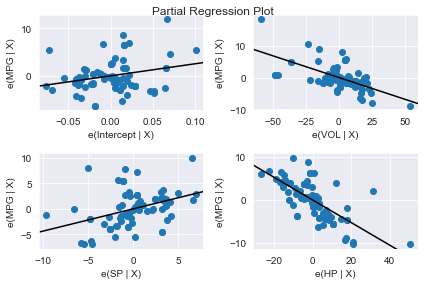

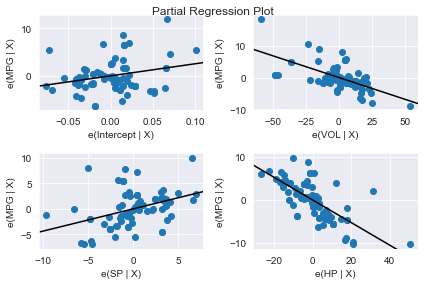

In [58]:
sm.graphics.plot_partregress_grid(final_ml_vol)

##### From the above partial regression plot, we can see that there no specific patterns formed--->it is of random cloud points, therefore the assumptions about errors are met and the model that we have built is correct.

# Predicting for new data points and the whole dataset

## Predicting MPG value using 3 new data points(i.e 3 i/p variables HP,VOL,SP resp.)

In [53]:
new_data=pd.DataFrame({'HP':40,'VOL':95,'SP':102},index=[1])

In [54]:
new_data

,HP,VOL,SP
1,40,95,102


In [55]:
#using our final model(final_ml_vol) to predict the mpg values on our new_data
final_ml_vol.predict(new_data)

1    46.035594
dtype: float64

## Predicting MPG value using the complete original dataset

In [56]:
pred_y=final_ml_vol.predict(cars)

In [57]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64

##### Above are the 81 predicted mpg values using our final model(final_ml_vol) for our whole dataset.

#### Note: The above multiple linear regression process is performed using traditional methods. Here, the correlation coeff. matrix and VIF can be replaced by 'feature engineering' technique, similarly calculating cook's distance or performing leverage plot, then dropping those outliers' data  and recreating the model everytime, these actions can be replaced by 'isolation forest' technique.